In [81]:
library(dplyr)
library(xts)
library(forecast)
library(lubridate)
library(writexl)

Warning message:
"package 'writexl' was built under R version 4.3.3"


In [2]:
data = read.csv("Final/store_sales.csv",stringsAsFactors = FALSE)
names(data) <- tolower(names(data))

data$date = mdy(data$date)
head(data)

,store,dept,date,weekly_sales,isholiday
,<int>,<int>,<date>,<dbl>,<lgl>
1,1,1,2010-02-05,24924.50,FALSE
2,1,2,2010-02-05,50605.27,FALSE
3,1,3,2010-02-05,13740.12,FALSE
4,1,4,2010-02-05,39954.04,FALSE
5,1,5,2010-02-05,32229.38,FALSE
6,1,6,2010-02-05,5749.03,FALSE


In [3]:
dept_1_no_holiday = filter(data,dept==1 & isholiday==FALSE )

In [4]:
mean(dept_1_no_holiday$weekly_sales)

[1] 19902.55

In [5]:
store_1_sales = filter(data,store==1 )

In [6]:
store_1_weekly_sales_data=store_1_sales %>%
  group_by(date) %>%
  summarise(weekly_sales = sum(weekly_sales, na.rm = TRUE))

In [84]:
write_xlsx(store_1_weekly_sales_data,"C:/Users/Will/Downloads/df.xlsx")

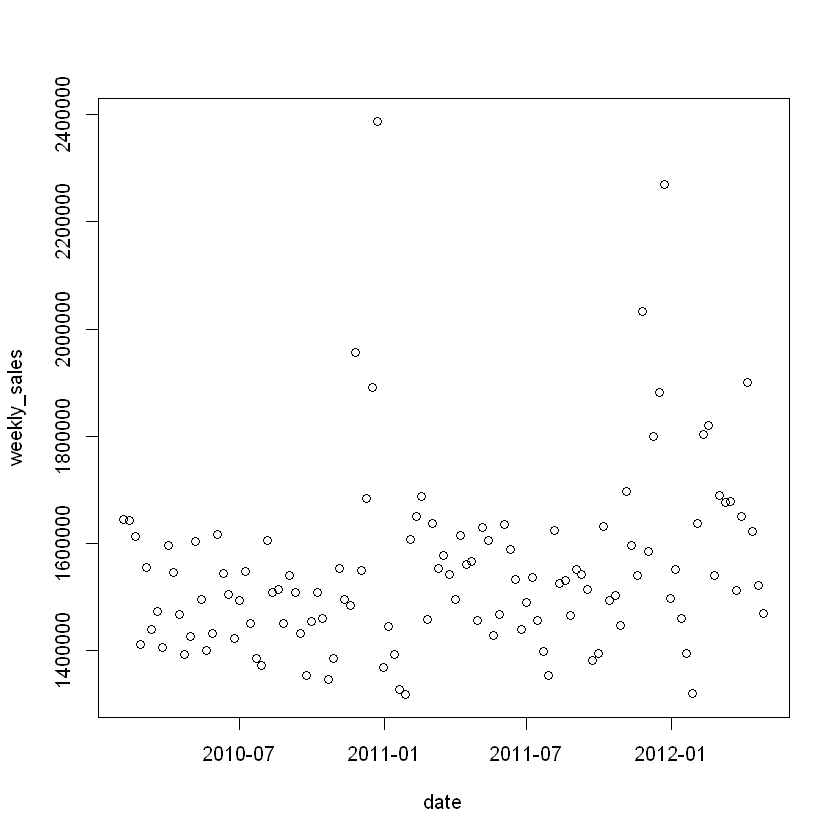

In [85]:
plot(store_1_weekly_sales_data)

In [28]:
store_1_weekly_sales <- ts(store_1_weekly_sales_data["weekly_sales"], start = 1,end=nrow(store_1_weekly_sales_data), frequency = 52)
store_1_weekly_sales_test = ts(store_1_weekly_sales_data["weekly_sales"], start = 1,end=nrow(store_1_weekly_sales_data), frequency = 52)
head(store_1_weekly_sales)

A Time Series:
[1] 1643691 1641957 1611968 1409728 1554807 1439542

In [87]:
store_1_weekly_sales <- ts(store_1_weekly_sales_data[["weekly_sales"]],
                           start = 1,
                           end=nrow(store_1_weekly_sales_data) , # Year 1, Week 1
                           frequency = 52)   # Weekly frequency

# Define test data similarly
store_1_weekly_sales_test <- ts(store_1_weekly_sales_data[["weekly_sales"]],
                                start = nrow(store_1_weekly_sales_data),
                                frequency = 52)

In [88]:
nrow(store_1_weekly_sales_data)

[1] 117

In [89]:
store_1_weekly_sales <- ts(store_1_weekly_sales_data[["weekly_sales"]],
                           start = 1,
                           end=117 , # Year 1, Week 1
                           frequency = 52)   # Weekly frequency

# Define test data similarly
store_1_weekly_sales_test <- ts(store_1_weekly_sales_data[["weekly_sales"]],
                                start = 118,
                                frequency = 52)

In [90]:
weekly_smoothing_model =ses(store_1_weekly_sales, alpha = 0.25, h = 100)

In [121]:
length(weekly_smoothing_model$fitted)

[1] 6033

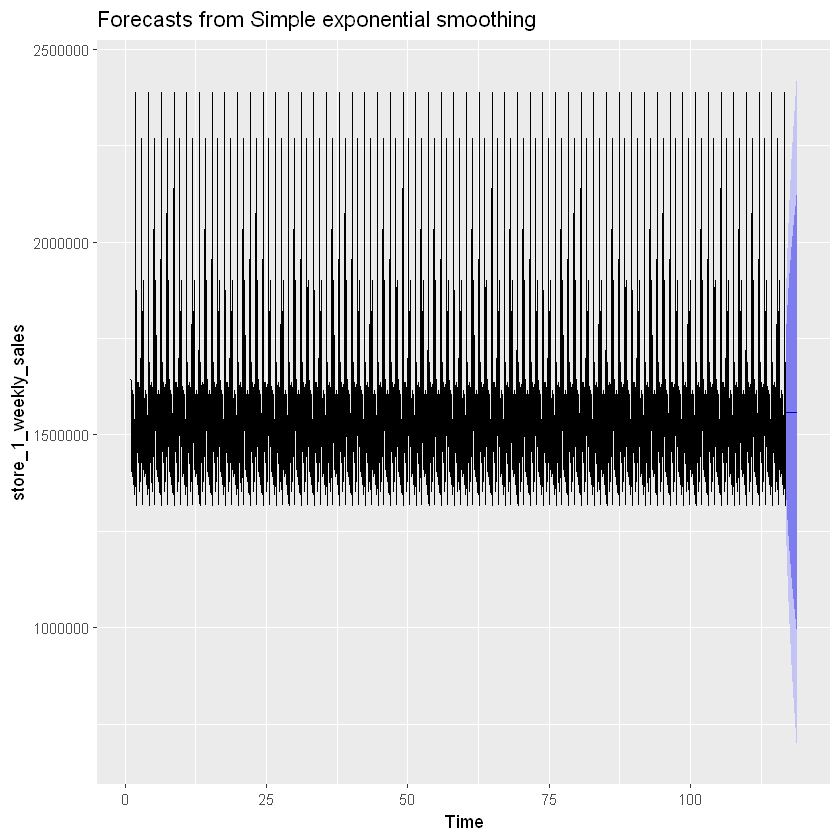

In [91]:
autoplot(weekly_smoothing_model)

In [92]:
accuracy(weekly_smoothing_model, store_1_weekly_sales_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.970818,166924.6,115158.3,-0.8687932,7.219754,1.091494,0.1235624,NA
Test set,-34141.718266,175381.2,119225.1,-3.2580033,7.534393,1.130040,0.2508005,0.9438884


In [106]:
rsfe = sum(weekly_smoothing_model$residuals)
rsfe


[1] -29988.95

In [107]:
mad = sum(abs(weekly_smoothing_model$residuals))/length((weekly_smoothing_model$residuals))
mad

[1] 115158.3

In [118]:
length(weekly_smoothing_model$residuals)

[1] 6033

In [105]:
rsfe/mad

[1] -0.2604151

In [ ]:
weekly_smoothing_model$r

In [112]:
alpha <- seq(0.01, 0.99, 0.01)
RMSE <- NA
mads = NA
tss = NA
rsfes = NA
MFE = NA
for(i in seq_along(alpha)) {
  fcast <- ses(store_1_weekly_sales, alpha = alpha[i], h = 100)
  rsfe = sum(fcast$residuals)
  mad = sum(abs(fcast$residuals))/length((fcast$residuals))
  ts = rsfe/mad
  mfe = sum(fcast$residuals)/length((fcast$residuals))

  RMSE[i] <- accuracy(fcast, store_1_weekly_sales_test)[2, 2]
  mads[i] = mad
  tss[i] = ts
  rsfes[i] = rsfe
  MFE[i]= mfe
}

error <- data_frame(alpha, RMSE,mads,tss,rsfes,MFE) # turn our RMSE values for alpha .01-.99 into a data frame
minimum <- filter(error, RMSE == min(RMSE)) # plot RMSE values for alpha .01-.99
minimum

alpha,RMSE,mads,tss,rsfes,MFE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.02,173622.8,112806.7,9.330228,1052512,174.4591


In [114]:
filter(error,alpha==.25 | alpha==.75)

alpha,RMSE,mads,tss,rsfes,MFE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.25,175381.2,115158.3,-0.2604151,-29988.95,-4.970818
0.75,184881.1,119847.5,-0.5218632,-62543.98,-10.366978


In [115]:
filter(error, tss == max(tss))

alpha,RMSE,mads,tss,rsfes,MFE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,173726.7,112912.4,10.0384,1133460,187.8767


In [122]:
weekly_smoothing_model_2 =ses(store_1_weekly_sales, alpha = 0.5, h = 100)

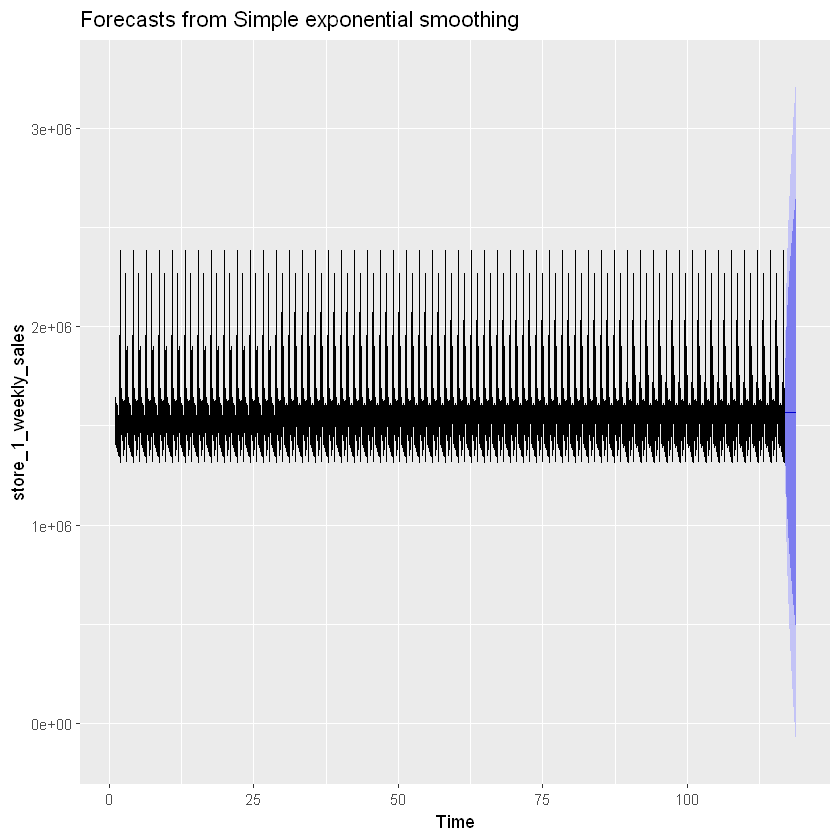

In [123]:
autoplot(weekly_smoothing_model_2)